In [2]:
!pip install --user virtualenv

     |████████████████████████████████| 4.6MB 28kB/s  eta 0:00:01     |███████▏                        | 1.0MB 3.5MB/s eta 0:00:02     |████████████▋                   | 1.8MB 3.5MB/s eta 0:00:01     |██████████████▉                 | 2.1MB 3.5MB/s eta 0:00:01██████████▋              | 2.5MB 3.5MB/s eta 0:00:01     |████████████████████████▏       | 3.5MB 2.5MB/s eta 0:00:01
     |████████████████████████████████| 573kB 6.9MB/s eta 0:00:01
  Created wheel for distlib: filename=distlib-0.3.0-cp35-none-any.whl size=336971 sha256=1fb7a2c3827e3d4ed2081cb1f6e4af393e28fa9384b162369f9ac0eb8e690612
  Stored in directory: /home/nbuser/.cache/pip/wheels/6e/e8/db/c73dae4867666e89ba3cfbc4b5c092446f0e584eda6f409cbb
Successfully built distlib
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
!pip install --upgrade pip

     |████████████████████████████████| 1.4MB 3.2MB/s eta 0:00:01
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1


In [8]:
!pip install -r binder/requirements.txt

In [28]:
import scipy
import numpy
import matplotlib
import pandas
from sklearn import model_selection
import pandas as pd
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from matplotlib import pyplot
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [7]:
import seaborn as sns 
iris = sns.load_dataset('iris')

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [7]:
iris.shape #grabs dimensions of the dataset
#peeking at the data 
iris.head()  #shows all rows 
#iris.tail(3) #last three rows, also allows for "peeking" at the data 

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
iris.describe()  #quick stat summary of data

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
iris.groupby('sepal_length').size()

sepal_length
4.3     1
4.4     3
4.5     1
4.6     4
4.7     2
4.8     5
4.9     6
5.0    10
5.1     9
5.2     4
5.3     1
5.4     6
5.5     7
5.6     6
5.7     8
5.8     7
5.9     3
6.0     6
6.1     6
6.2     4
6.3     9
6.4     7
6.5     5
6.6     2
6.7     8
6.8     3
6.9     4
7.0     1
7.1     1
7.2     3
7.3     1
7.4     1
7.6     1
7.7     4
7.9     1
dtype: int64

In [12]:
iris.groupby('sepal_width').size()

sepal_width
2.0     1
2.2     3
2.3     4
2.4     3
2.5     8
2.6     5
2.7     9
2.8    14
2.9    10
3.0    26
3.1    11
3.2    13
3.3     6
3.4    12
3.5     6
3.6     4
3.7     3
3.8     6
3.9     2
4.0     1
4.1     1
4.2     1
4.4     1
dtype: int64

In [14]:
iris.groupby('petal_length').size()

petal_length
1.0     1
1.1     1
1.2     2
1.3     7
1.4    13
1.5    13
1.6     7
1.7     4
1.9     2
3.0     1
3.3     2
3.5     2
3.6     1
3.7     1
3.8     1
3.9     3
4.0     5
4.1     3
4.2     4
4.3     2
4.4     4
4.5     8
4.6     3
4.7     5
4.8     4
4.9     5
5.0     4
5.1     8
5.2     2
5.3     2
5.4     2
5.5     3
5.6     6
5.7     3
5.8     3
5.9     2
6.0     2
6.1     3
6.3     1
6.4     1
6.6     1
6.7     2
6.9     1
dtype: int64

In [15]:
iris.groupby('petal_width').size()

petal_width
0.1     5
0.2    29
0.3     7
0.4     7
0.5     1
0.6     1
1.0     7
1.1     3
1.2     5
1.3    13
1.4     8
1.5    12
1.6     4
1.7     2
1.8    12
1.9     5
2.0     6
2.1     6
2.2     3
2.3     8
2.4     3
2.5     3
dtype: int64

In [16]:
iris.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbf66aca080>,
      dtype=object)

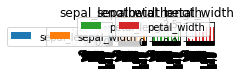

In [44]:
iris.plot(kind = 'bar',sharex=False, sharey=False, subplots=True, layout=(10,10))

sepal_length       AxesSubplot(0.125,0.536818;0.352273x0.343182)
sepal_width     AxesSubplot(0.547727,0.536818;0.352273x0.343182)
petal_length          AxesSubplot(0.125,0.125;0.352273x0.343182)
petal_width        AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

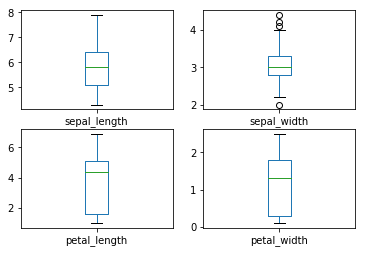

In [15]:
iris.plot(kind='box', sharex=False, sharey=False, subplots= True, layout=(2,2) )

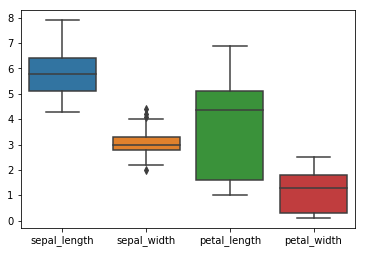

In [7]:
sns.boxplot(data=iris)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9ad51bf5f8>,
      dtype=object)

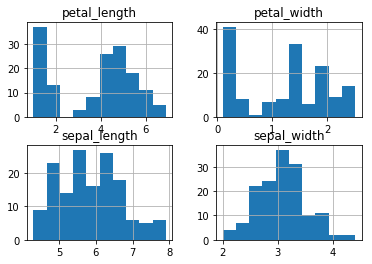

In [20]:
iris.hist()

In [12]:
#splitting our data into training & testing data 
array = iris.values   #sets the dataset into a 2d array 
X = array[:,0:4] #grabs the 4 columns of data
Y = array[:,4]  #the data we are predicting, the last column, species 

#validation_size = 0.20  #using 20% of the data set to validate 

#plitting data into training and validation 
#X's = the features for input for the model 
#Y's = expected outcomes 

X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=0.2, random_state = 1)

print(X_train.shape, Y_train.shape)
print(X_validation.shape, Y_validation.shape)

(120, 4) (120,)
(30, 4) (30,)


In [40]:
#LR: logistic regression, LDA: Linear Discriminant Analysis, KNN: K-nearest neighbors
#CART: classification and Regression Trees, NB: Gaussian Naive Bayes, SVM: Support vector Machines
models = []
models.append(('LR', sklearn.linear_model.LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.955909 (0.044337)
LDA: 0.975641 (0.037246)
KNN: 0.950524 (0.040563)
CART: 0.951166 (0.052812)
NB: 0.951166 (0.052812)
SVM: 0.983333 (0.033333)


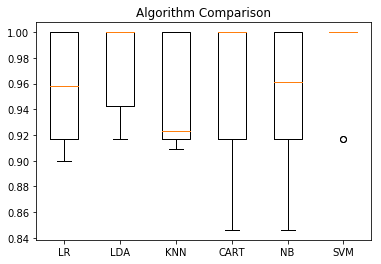

In [35]:
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [26]:
model = SVC(gamma='auto')
model.fit(X_train, Y_train)  #fit the training algs
predictions = model.predict(X_validation)    #make a prediction based of X validations

In [38]:
print(accuracy_score(Y_validation, predictions))  #provide an accuracy score based on similarity 
print(confusion_matrix(Y_validation, predictions))  
print(classification_report(Y_validation, predictions))  

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        11
 versicolor       1.00      0.92      0.96        13
  virginica       0.86      1.00      0.92         6

avg / total       0.97      0.97      0.97        30

